In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/root/customer_churn.csv')

# Display the first few rows of the dataframe
print(data.head())

              Names   Age  Total_Purchase  Account_Manager  Years  Num_Sites  \
0  Cameron Williams  42.0        11066.80                0   7.22        8.0   
1     Kevin Mueller  41.0        11916.22                0   6.50       11.0   
2       Eric Lozano  38.0        12884.75                0   6.67       12.0   
3     Phillip White  42.0         8010.76                0   6.71       10.0   
4    Cynthia Norton  37.0         9191.58                0   5.56        9.0   

          Onboard_date                                           Location  \
0  2013-08-30 07:00:40      10265 Elizabeth Mission Barkerburgh, AK 89518   
1  2013-08-13 00:38:46  6157 Frank Gardens Suite 019 Carloshaven, RI 1...   
2  2016-06-29 06:20:07             1331 Keith Court Alyssahaven, DE 90114   
3  2014-04-22 12:43:12       13120 Daniel Mount Angelabury, WY 30645-4695   
4  2016-01-19 15:31:15                765 Tricia Row Karenshire, MH 71730   

                       Company  Churn  
0               

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64
              Age  Total_Purchase  Account_Manager       Years   Num_Sites  \
count  900.000000      900.000000       900.000000  900.000000  900.000000   
mean    41.816667    10062.824033         0.481111    5.273156    8.587778   
std      6.127560     2408.644532         0.499921    1.274449    1.764836   
min     22.000000      100.000000         0.000000    1.000000    3.000000   
25%     38.000000     8497.122500         0.000000    4.450000    7.000000   
50%     42.000000    10045.870000         0.000000    5.215000    8.000000   
75%     46.000000    11760.105000         1.000000    6.110000   10.000000   
max     65.000000    18026.010000         1.000000    9.150000   14.000000   

            Churn  
count  900.000000  
mean     0.166667  
std      0.372

<Axes: xlabel='Churn', ylabel='count'>

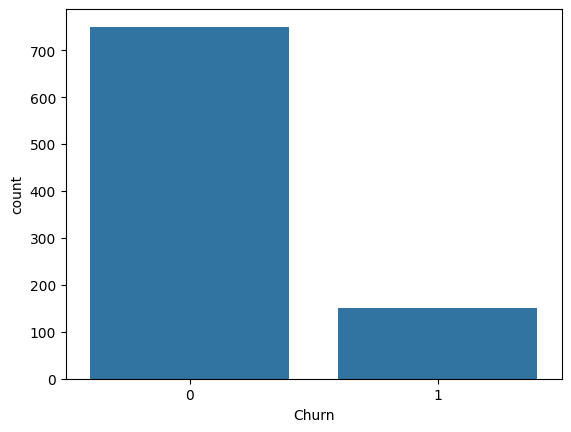

In [3]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Distribution of the target variable
import seaborn as sns
sns.countplot(x='Churn', data=data)

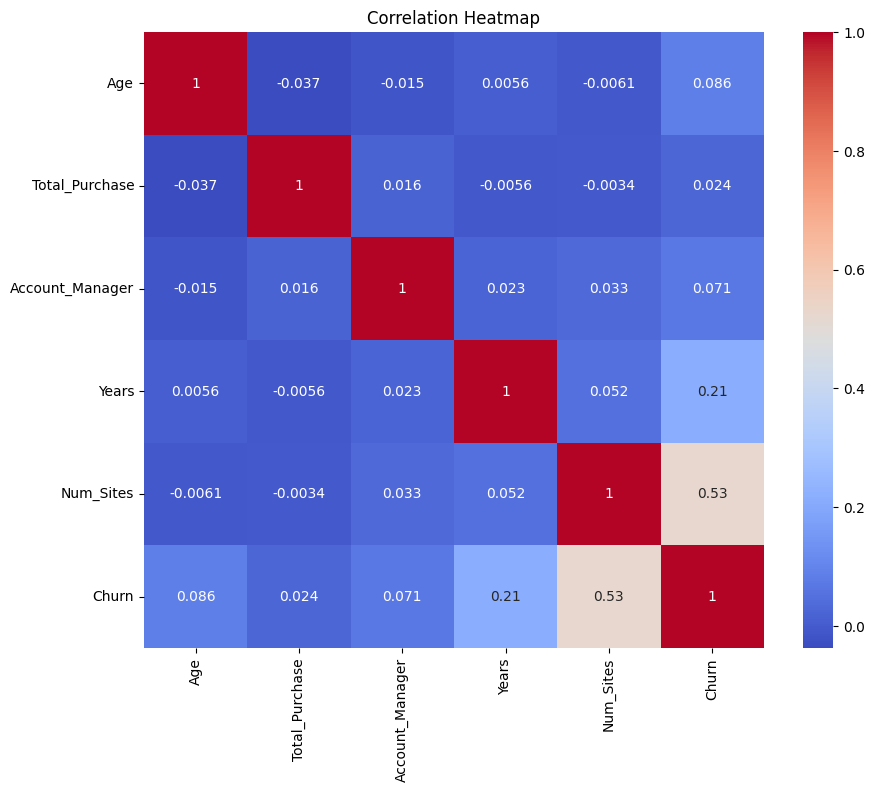

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Make sure to import NumPy

# Assuming 'data' is your DataFrame
# Select only the numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Example handling missing values: filling missing values with the mean (for numerical columns) or mode (for categorical columns)
for column in data.columns:
    if data[column].dtype == np.number:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Encoding categorical variables
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
for col in categorical_columns:
    if data[col].nunique() == 2:
        data[col] = LabelEncoder().fit_transform(data[col])
    else:
        # For more than 2 categories, use pd.get_dummies
        data = pd.get_dummies(data, columns=[col])

# Normalizing numerical features
numerical_columns = [col for col in data.columns if data[col].dtype == 'float64' or data[col].dtype == 'int64']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the transformed data
print(data.head())

<ipython-input-9-aba609c0d4b9>:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-9-aba609c0d4b9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-9-aba609c0d4b9>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavi

        Age  Total_Purchase  Account_Manager     Years  Num_Sites     Churn  \
0  0.029936        0.417054         -0.96291  1.528446  -0.333235  2.236068   
1 -0.133352        0.769905         -0.96291  0.963182   1.367585  2.236068   
2 -0.623215        1.172234         -0.96291  1.096647   1.934526  2.236068   
3  0.029936       -0.852432         -0.96291  1.128051   0.800645  2.236068   
4 -0.786503       -0.361917         -0.96291  0.225198   0.233705  2.236068   

   Names_Aaron King  Names_Aaron Meyer  Names_Aaron West  \
0             False              False             False   
1             False              False             False   
2             False              False             False   
3             False              False             False   
4             False              False             False   

   Names_Abigail Gonzalez  ...  Company_Yates, Martinez and Cox  \
0                   False  ...                            False   
1                   False  ...

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Model evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       148
           1       1.00      0.09      0.17        32

    accuracy                           0.84       180
   macro avg       0.92      0.55      0.54       180
weighted avg       0.87      0.84      0.78       180

[[148   0]
 [ 29   3]]
